# Install and Import Dependencies

### Read a video 


In [1]:
import os
path = 'C:/Users/Azad/Downloads/images'
os.chdir(path)

In [2]:
import cv2

vidcap = cv2.VideoCapture('C:/Users/Azad/Downloads/back_side_2.mp4')
count = 0
success = True
fps = int(vidcap.get(cv2.CAP_PROP_FPS))
pathout = "C:/Users/Azad/Downloads/images"
while success:
    success,image = vidcap.read()
    print('read a new frame:',success)
    if count%(1*fps) == 0 :
        cv2.imwrite(os.path.join(pathout, "frame{:d}.jpg".format(count)),image)
        print('successfully written the frame')
    count+=1

read a new frame: True
successfully written 10th frame
read a new frame: True
read a new frame: True
read a new frame: True
read a new frame: True
read a new frame: True
read a new frame: True
read a new frame: True
read a new frame: True
read a new frame: True
read a new frame: True
read a new frame: True
read a new frame: True
read a new frame: True
read a new frame: True
read a new frame: True
read a new frame: True
read a new frame: True
read a new frame: True
read a new frame: True
read a new frame: True
read a new frame: True
read a new frame: True
read a new frame: True
read a new frame: True
read a new frame: True
read a new frame: True
read a new frame: True
read a new frame: True
read a new frame: True
read a new frame: True
successfully written 10th frame
read a new frame: True
read a new frame: True
read a new frame: True
read a new frame: True
read a new frame: True
read a new frame: True
read a new frame: True
read a new frame: True
read a new frame: True
read a new frame

KeyboardInterrupt: 

In [1]:
!pip install pytesseract
!pip install imutils

  Using cached easyocr-1.3.2-py3-none-any.whl (63.2 MB)
  Using cached python_bidi-0.4.2-py2.py3-none-any.whl (30 kB)
  Attempting uninstall: decorator
    Found existing installation: decorator 5.0.9
    Uninstalling decorator-5.0.9:
      Successfully uninstalled decorator-5.0.9
  Using cached imutils-0.5.4.tar.gz (17 kB)
  Created wheel for imutils: filename=imutils-0.5.4-py3-none-any.whl size=25860 sha256=ce6a21553ad19e4655cefa557a80e2306e0f201a719ed5c4785e6c5142a3f820
  Stored in directory: c:\users\azad\appdata\local\pip\cache\wheels\4b\a5\2d\4a070a801d3a3d93f033d3ee9728f470f514826e89952df3ea
Successfully built imutils


In [3]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import imutils
import pytesseract

In [4]:
cv2.__version__

'4.5.2'

## 1. Read in Image, Grayscale and Blur

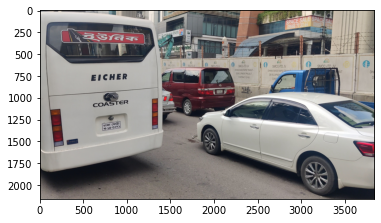

In [36]:
#image = cv2.imread('C:/Users/Azad/Pictures/Screenshots/b.png')
image = cv2.imread('C:/Users/Azad/Downloads/images/frame330.jpg')
#image = imutils.resize(img, width = 500)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

In [37]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

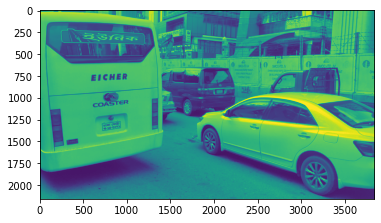

In [38]:
plt.imshow(gray)

In [39]:
gray_1 = cv2.bilateralFilter(gray,11,17,17)

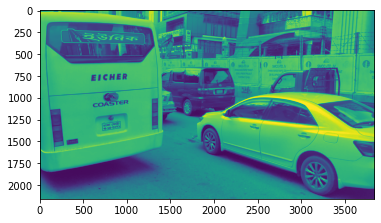

In [40]:
plt.imshow(gray_1)

In [41]:
edged = cv2.Canny(gray_1,170,200)

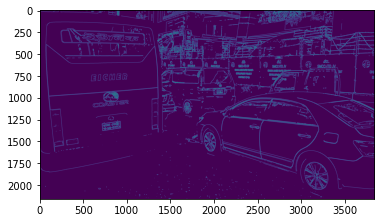

In [42]:
plt.imshow(edged)

In [43]:
cnts, new = cv2.findContours(edged.copy(),cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)

In [44]:
image1=cv2.drawContours(image.copy(),cnts,-1,(0,255,0),3)

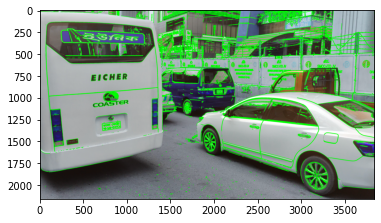

In [45]:
plt.imshow(image1)

In [46]:
cntos = sorted(cnts,key=cv2.contourArea, reverse = True)[:50]

In [47]:
NumberPlatecount = None

In [48]:
image2=cv2.drawContours(image.copy(),cntos,-1,(255,255,255),3)

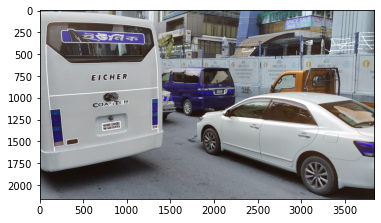

In [49]:
plt.imshow(image2)

### Collecting the Lisence plate 

In [50]:
name = 1
for i in cntos: 
    perimeter = cv2.arcLength(i,True)
    print("as "+ str(perimeter))
    approx = cv2.approxPolyDP(i, 0.05*perimeter, True)
    print("a "+ str(len(approx)))
    if(len(approx)>=4):
        NumberPlatecount = approx
        x,y,w,h = cv2.boundingRect(i)
        crp_img = image[y:y+h, x:x+w]
        cv2.imwrite('D:/output1/{}.png'.format(name),crp_img)
        name += 1


as 6796.001211047173
a 6
as 6790.829638004303
a 6
as 3808.888512134552
a 5
as 3806.5453664064407
a 5
as 2165.3036032915115
a 3
as 2162.9604580402374
a 3
as 606.7939372062683
a 4
as 604.4507911205292
a 4
as 579.4802289009094
a 4
as 577.137082695961
a 4
as 390.61017167568207
a 4
as 414.06601536273956
a 4
as 857.528998374939
a 2
as 852.3574266433716
a 2
as 330.56854140758514
a 7
as 338.2253955602646
a 6
as 328.8111820220947
a 7
as 336.46803617477417
a 6
as 493.11983823776245
a 4
as 493.0193325281143
a 4
as 4942.179046630859
a 2
as 258.71067678928375
a 5
as 256.3675310611725
a 5
as 300.6690466403961
a 7
as 298.32590079307556
a 7
as 190.1248904466629
a 4
as 187.78174555301666
a 4
as 258.9949473142624
a 6
as 256.6518018245697
a 6
as 201.94112491607666
a 4
as 199.5979790687561
a 4
as 247.33809304237366
a 5
as 794.3086559772491
a 2
as 785.7228693962097
a 2
as 193.94112491607666
a 4
as 190.18376553058624
a 4
as 388.6518015861511
a 4
as 212.36753153800964
a 6
as 289.1543278694153
a 2
as 210.6101